# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head())
print(study_results.head())

# Combine / Merge the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
print(df.shape)
print(df.info())
df.head()

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the number of unique mice IDs in the data.
df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Check for any mouse ID with duplicate time points
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10) 

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Display the data associated with that mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Then create a new DataFrame where the duplicate data is removed / dropped. 
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
# print(df2.shape)
# print(df2.info())
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Now check the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Create/generate a summary statistics should include:
# A row for each drug regimen. These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_vol_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_vol_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_std = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_vol_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
data = {
    "Tumor Average": tumor_vol_mean,
    "Tumor Median": tumor_vol_median,
    "Tumor Variance": tumor_vol_var,
    "Tumor Standard Deviation": tumor_vol_std,
    "Tumor SEM": tumor_vol_sem
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# The below doesn't seem to be a part of the Module Challenge, but was included in Starter Code
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
leaderboard2 = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
leaderboard2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

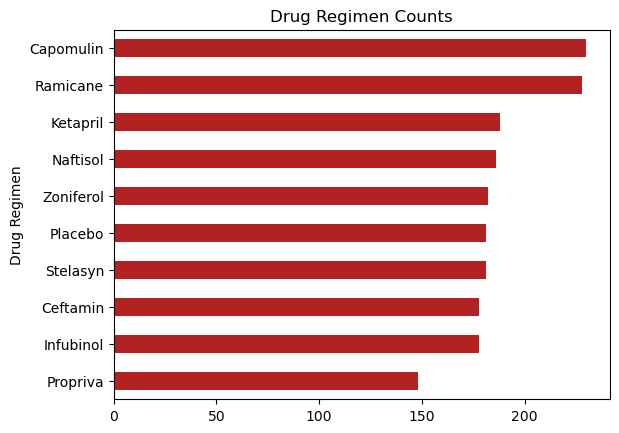

In [9]:
# Generate two bar charts. 
# Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.
# Create the first bar chart with the Pandas DataFrame.plot() method.
df2["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="firebrick")
# To make horizontal, add kind="barh" in .plot()

plt.show()

In [10]:
# Create the second bar chart with Matplotlib's pyplot methods.
data = df2["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2["Sex"].value_counts() # this is the data they want you to use 

Sex
Male      958
Female    922
Name: count, dtype: int64

In [12]:
mouse_metadata.Sex.value_counts() # not this 

Sex
Male      125
Female    124
Name: count, dtype: int64

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [14]:
# import seaborn as sns

In [16]:
# plt.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
# plt.boxplot.show()

In [ ]:
# sns.violinplot(data=df2, y="Drug Regimen", x="Tumor Volume (mm3)", hue="Sex", split=True)
# plt.xticks(rotation=90)
# plt.show()

In [29]:
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
Hello Sarah I want to kiss you sooooo mu

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df2.groupby(["Mouse ID"])["Timepoint"].max()
# print(last_timepoint)
last_timepoint.reset_index()
print(last_timepoint.index)
last_timepoint_df = pd.DataFrame(data=last_timepoint, columns="Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_vol_timepoint_df = pd.merge(df2, last_timepoint, on=["Timepoint", "Mouse ID"], how="left")
merged_tumor_vol_timepoint_df

Index(['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457',
       'a492',
       ...
       'y769', 'y793', 'y865', 'z234', 'z314', 'z435', 'z578', 'z581', 'z795',
       'z969'],
      dtype='object', name='Mouse ID', length=248)


TypeError: Index(...) must be called with a collection of some kind, 'Timepoint' was passed

In [39]:
merged_tumor_vol_timepoint_df2 = df2.merge(last_timepoint, on=["Timepoint", "Mouse ID"], how="left")
merged_tumor_vol_timepoint_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Put treatments into a list for loop (and later for plot labels)
Drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# for drug in "Drug Regimen" 

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
